In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ponto de coleta dos dados históricos: PINH04900
Ponto de coleta do último dado: Ponte Cidade Jardim

In [252]:
df_2012_2017 = pd.read_excel('PINH04900_2012_2017.xlsx', decimal=",")
df_2017_2022 = pd.read_excel('PINH04900_2017_2022.xlsx', decimal=",")

In [253]:
df_2012_2022 = pd.concat([df_2012_2017, df_2017_2022])
df_2012_2022.head()

,Período DE,Período ATE,Cod_Interaguas,Tipo Rede,UGRHI,Código Ponto,Status Ponto,Data Coleta,Hora Coleta,Parametro,...,CLASSE,Município,UF,Inicio Operação,Fim Operação,Latitude,Longitude,Altitude,Localização,Captação
0,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,12/11/2012,15:40,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
1,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,21/01/2013,12:49,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
2,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,18/03/2013,12:45,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
3,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,06/05/2013,14:40,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N
4,08/11/2012,08/11/2017,122,Rede Básica,06 - ALTO TIÊTE,PINH04900,Ativo,15/07/2013,09:52,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1998,NaN,23 31 52,46 44 54,720,"Próximo à sua foz no Rio Tietê, na Estrutura d...",N


In [254]:
df_2012_2022['datetime'] = pd.to_datetime(df_2012_2022['Data Coleta'] + ' ' + df_2012_2022['Hora Coleta'])
df_2012_2022['datetime']

0      2012-12-11 15:40:00
1      2013-01-21 12:49:00
2      2013-03-18 12:45:00
3      2013-06-05 14:40:00
4      2013-07-15 09:52:00
               ...        
1651   2022-06-10 10:05:00
1652   2022-06-10 10:05:00
1653   2022-06-10 10:05:00
1654   2022-06-10 10:05:00
1655   2022-06-10 10:05:00
Name: datetime, Length: 3007, dtype: datetime64[ns]

In [255]:
df_2012_2022 = df_2012_2022.sort_values(by='datetime')

In [256]:
df_2012_2022_ph = df_2012_2022.loc[df_2012_2022['Parametro'] == 'pH']
df_2012_2022_coliformes = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Escherichia coli**']
df_2012_2022_dbo = df_2012_2022.loc[df_2012_2022['Parametro'] == 'DBO (5, 20)']
df_2012_2022_fosforo = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Fósforo Total']
df_2012_2022_nitrogenio = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Nitrogênio Kjeldahl']
df_2012_2022_oxigenio = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Oxigênio Dissolvido']
df_2012_2022_solidos = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Sólido Total']
df_2012_2022_temperatura_agua = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Temperatura da Água']
df_2012_2022_temperatura_ar = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Temperatura do Ar']
df_2012_2022_turbidez = df_2012_2022.loc[df_2012_2022['Parametro'] == 'Turbidez']

In [257]:
variacao_temperatura = []
for n in range(0, len(df_2012_2022_temperatura_agua)):
    variacao_temperatura.append(float(df_2012_2022_temperatura_agua.iloc[n]['Valor']) - float(df_2012_2022_temperatura_ar.iloc[n]['Valor']))

In [258]:
from matplotlib import dates as mdates

def plot_historic(title, datetimes, y, datetimes_label, y_label):
    fig, ax = plt.subplots(figsize=(20,10))
    plt.title(title)
    plt.xlabel(datetimes_label)
    plt.ylabel(y_label)
    plt.plot(datetimes, y, '--o')
    for year in range(2012, 2023):
        plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='-', alpha=0.2)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    ax.set_xticks(ax.get_xticks()[::3])
    plt.show()

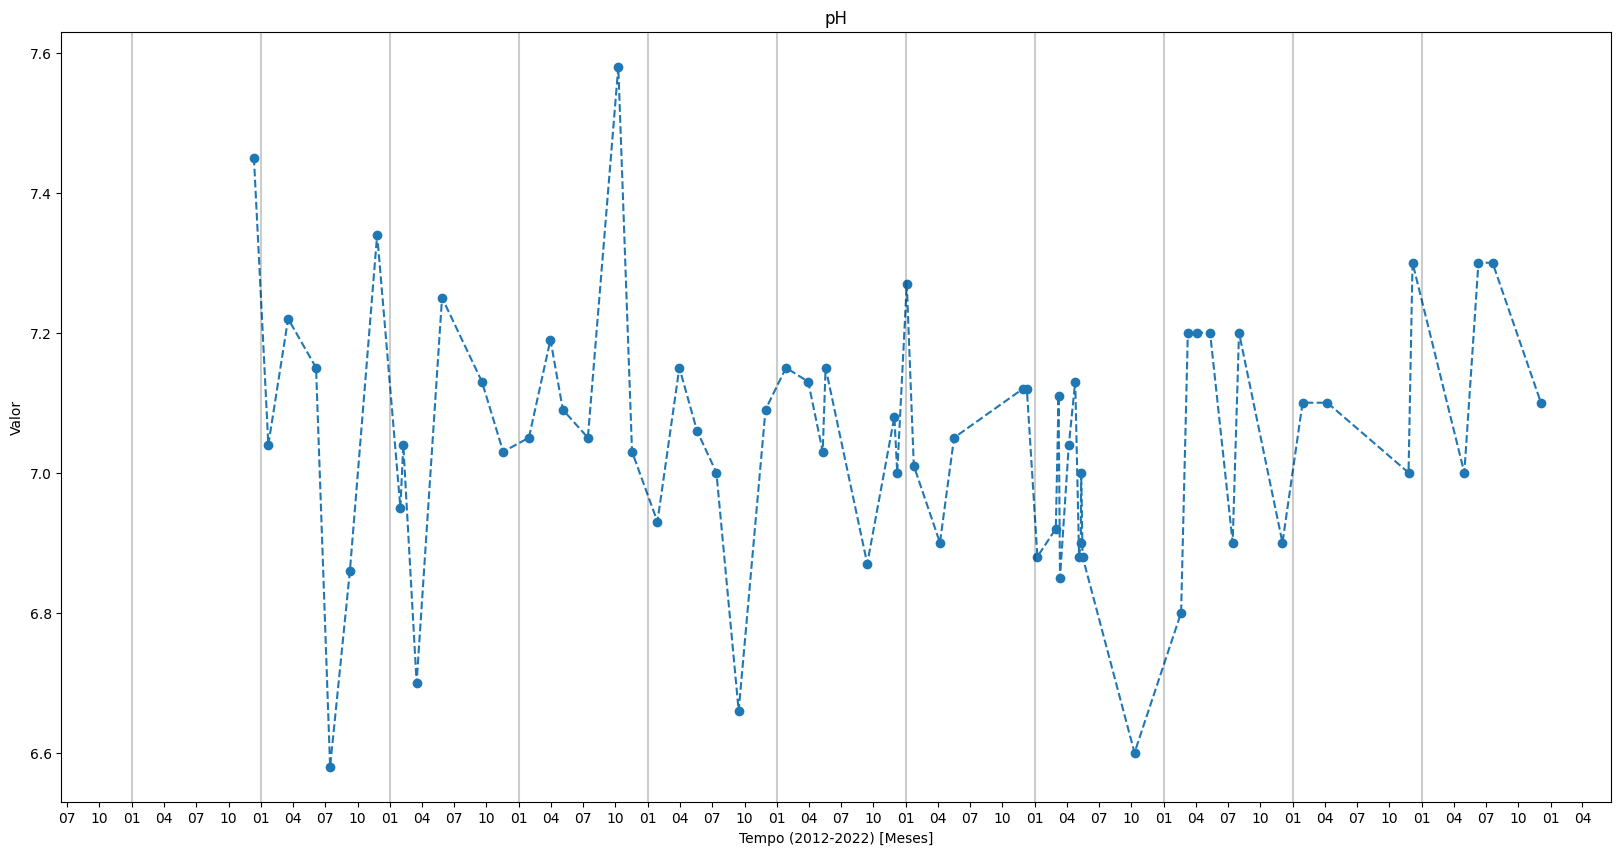

In [259]:
plot_historic('pH', df_2012_2022_ph['datetime'], df_2012_2022_ph['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Valor')

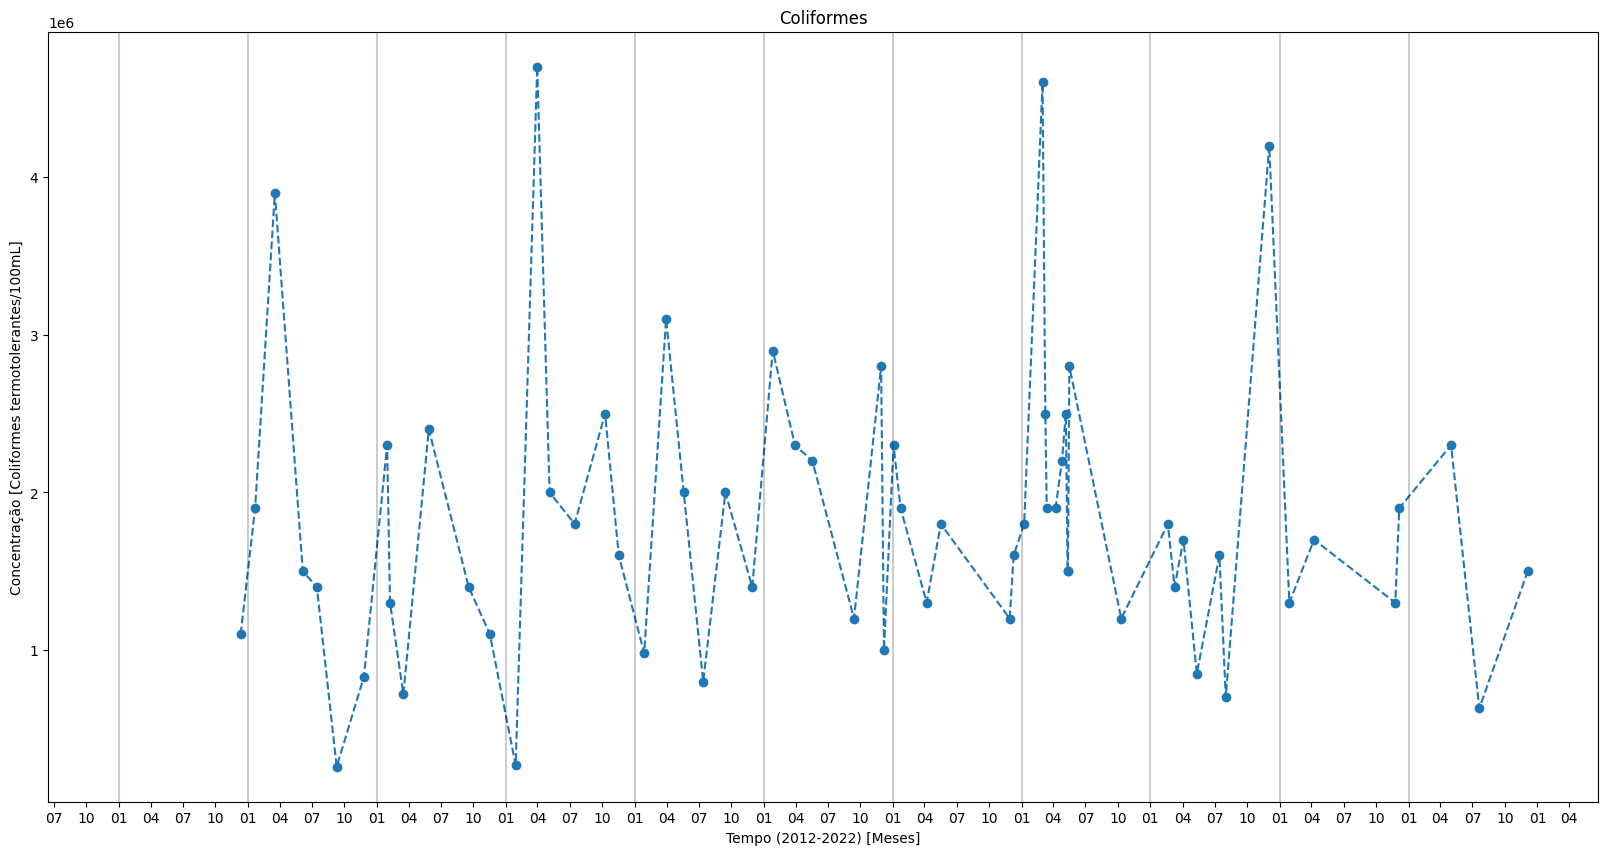

In [260]:
plot_historic('Coliformes', df_2012_2022_coliformes['datetime'], df_2012_2022_coliformes['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [Coliformes termotolerantes/100mL]')

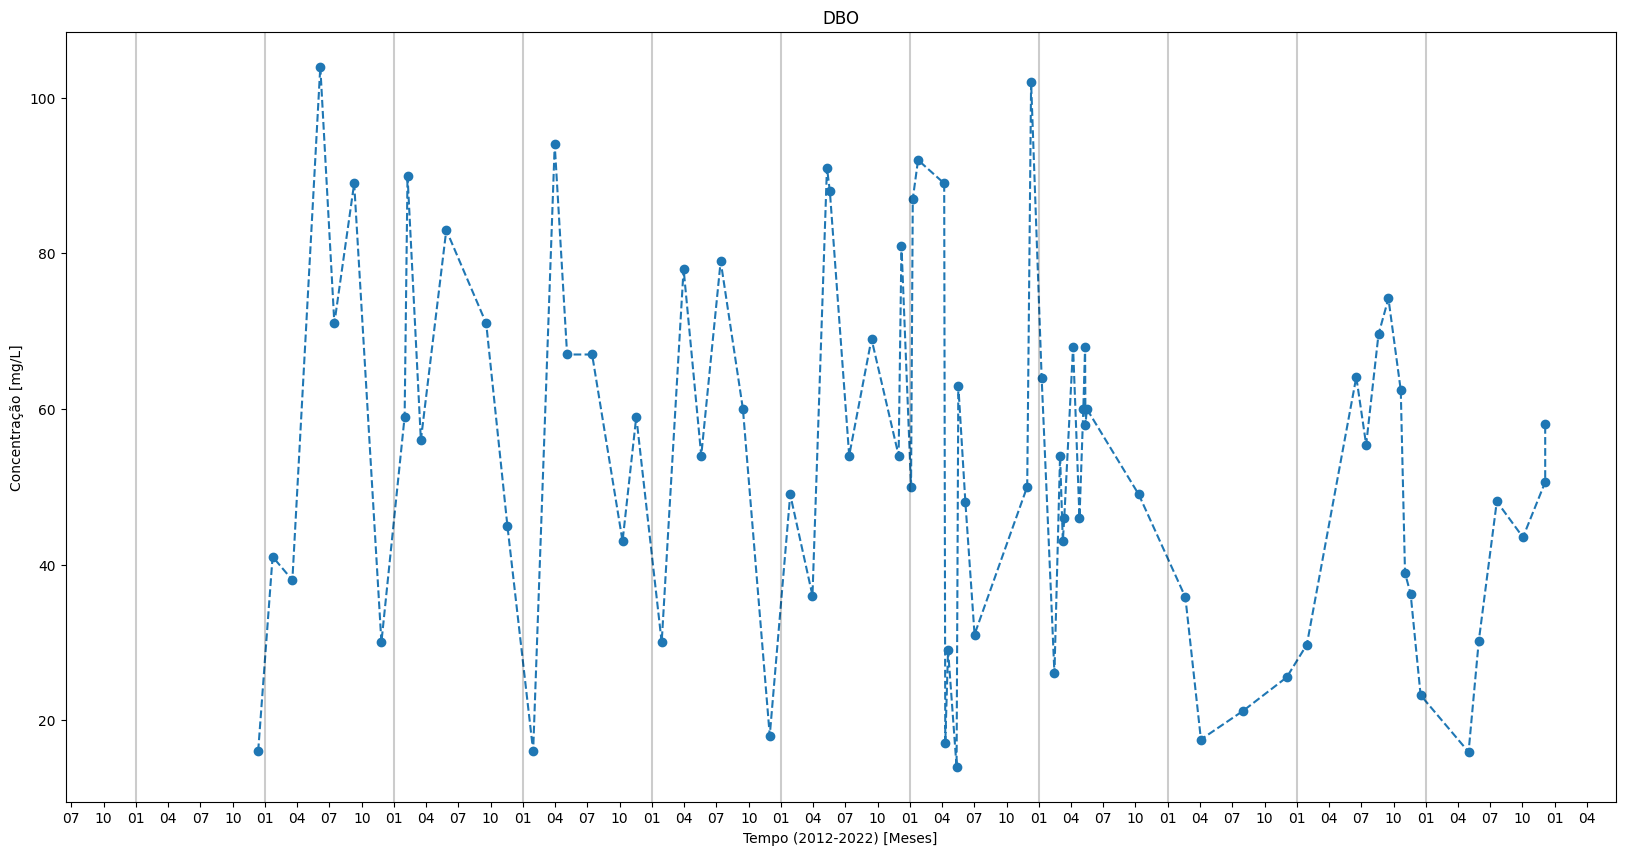

In [261]:
plot_historic('DBO', df_2012_2022_dbo['datetime'], df_2012_2022_dbo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

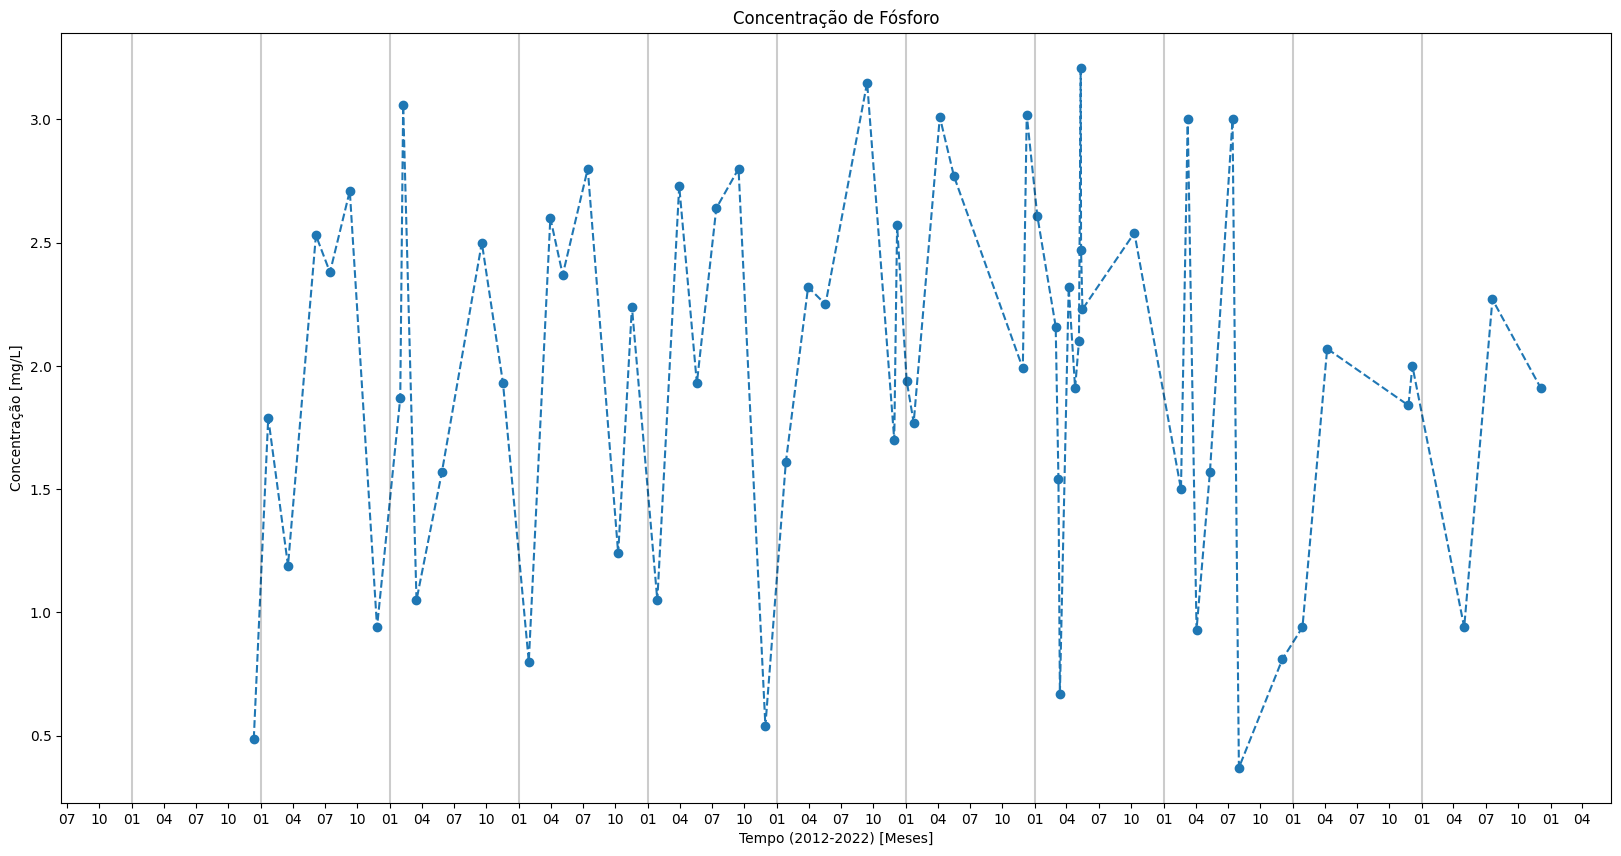

In [262]:
plot_historic('Concentração de Fósforo', df_2012_2022_fosforo['datetime'], df_2012_2022_fosforo['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

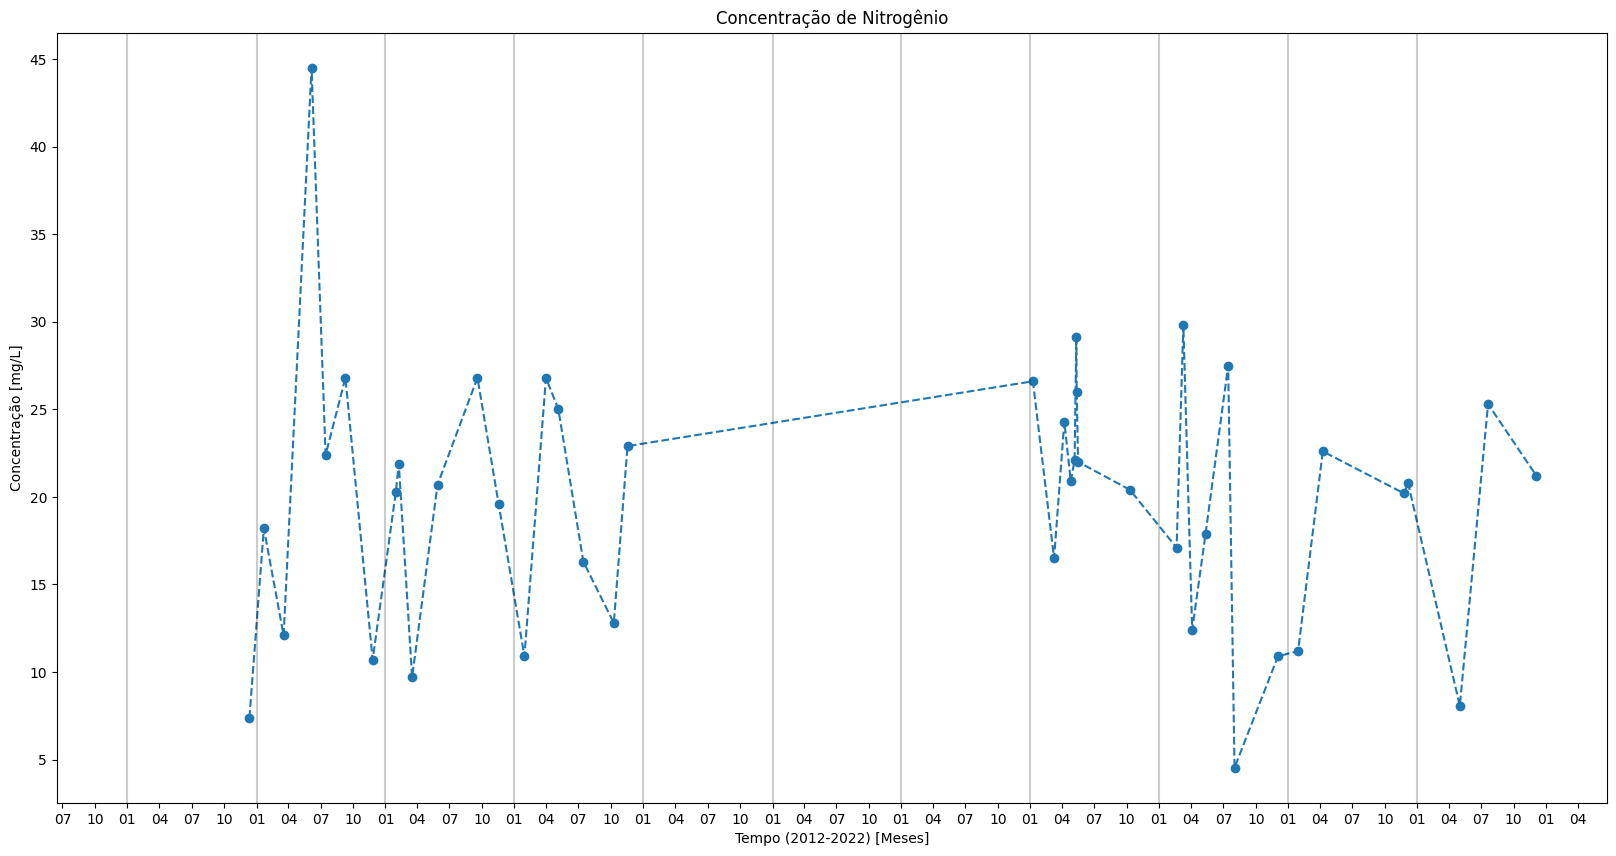

In [263]:
plot_historic('Concentração de Nitrogênio', df_2012_2022_nitrogenio['datetime'], df_2012_2022_nitrogenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

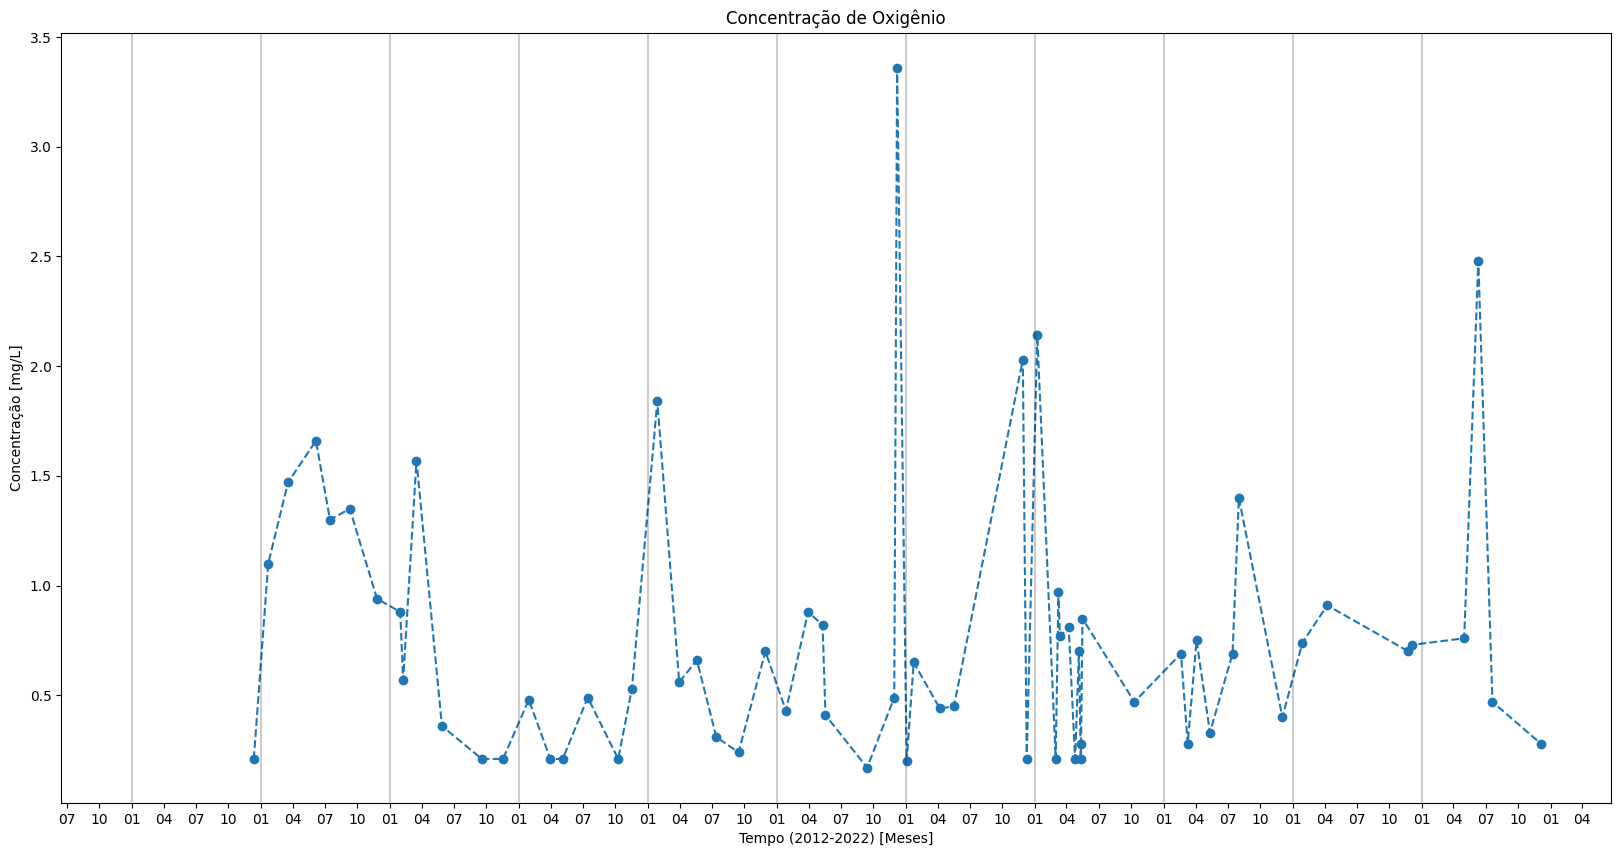

In [264]:
plot_historic('Concentração de Oxigênio', df_2012_2022_oxigenio['datetime'], df_2012_2022_oxigenio['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

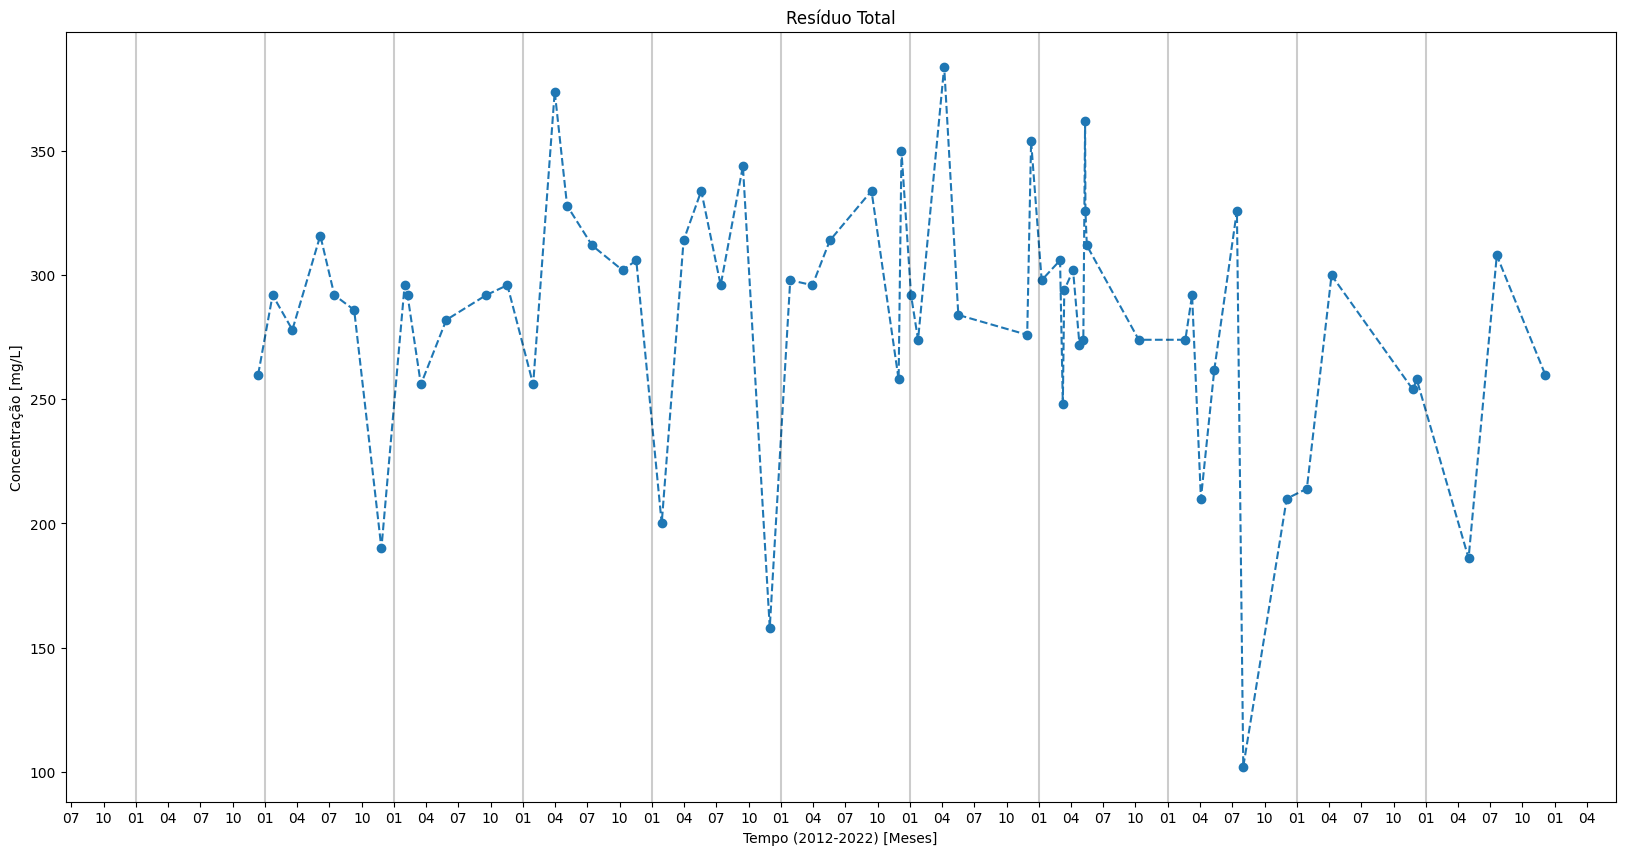

In [265]:
plot_historic('Resíduo Total', df_2012_2022_solidos['datetime'], df_2012_2022_solidos['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Concentração [mg/L]')

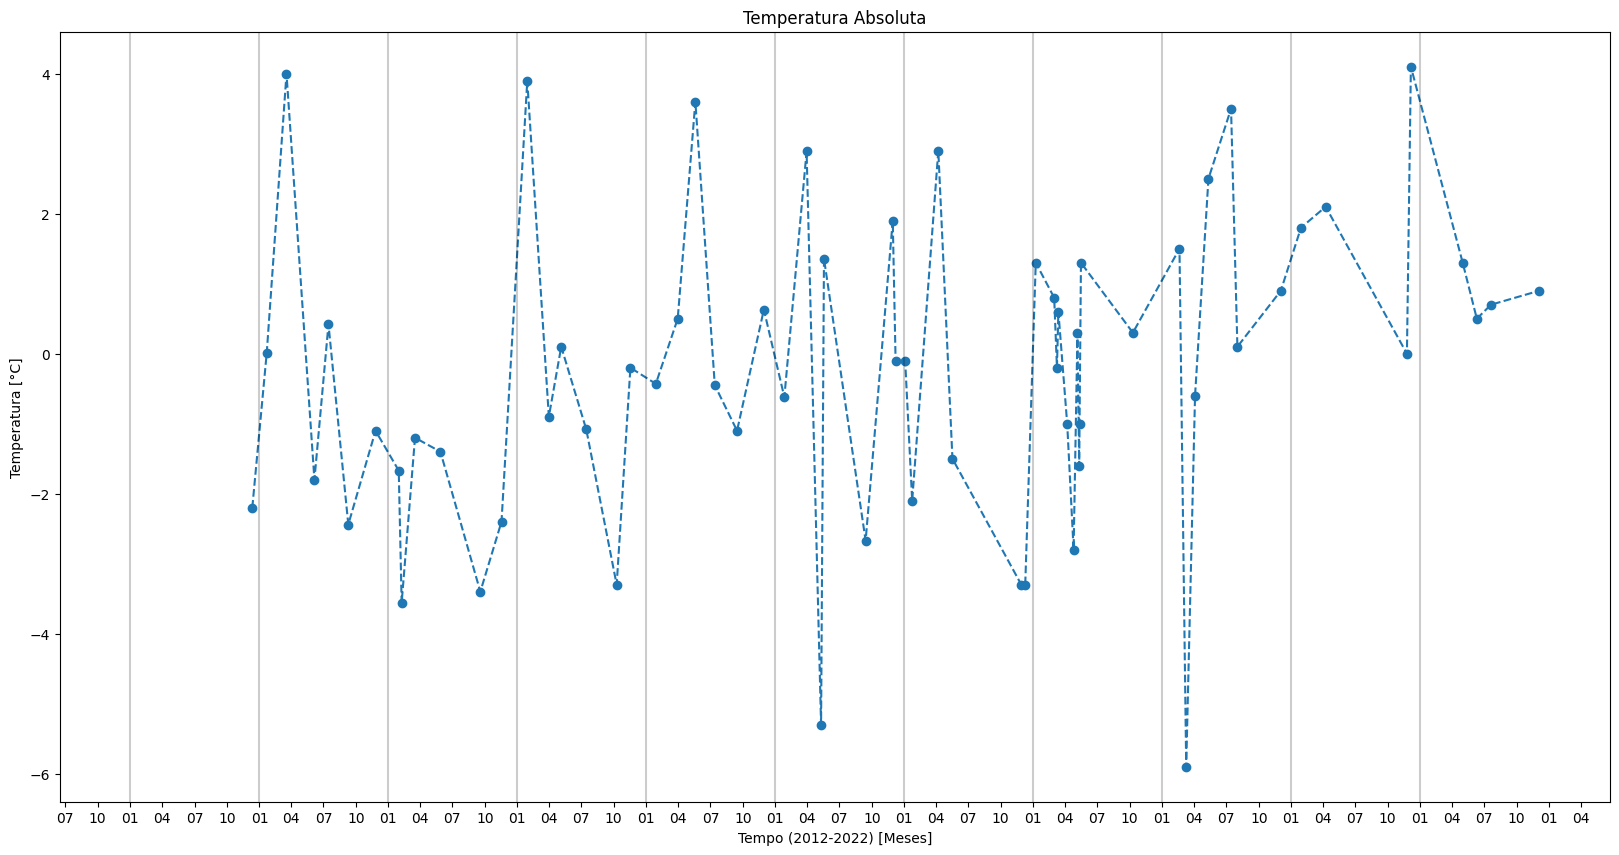

In [266]:
plot_historic('Temperatura Absoluta', df_2012_2022_temperatura_agua['datetime'], variacao_temperatura, 'Tempo (2012-2022) [Meses]', 'Temperatura [°C]')

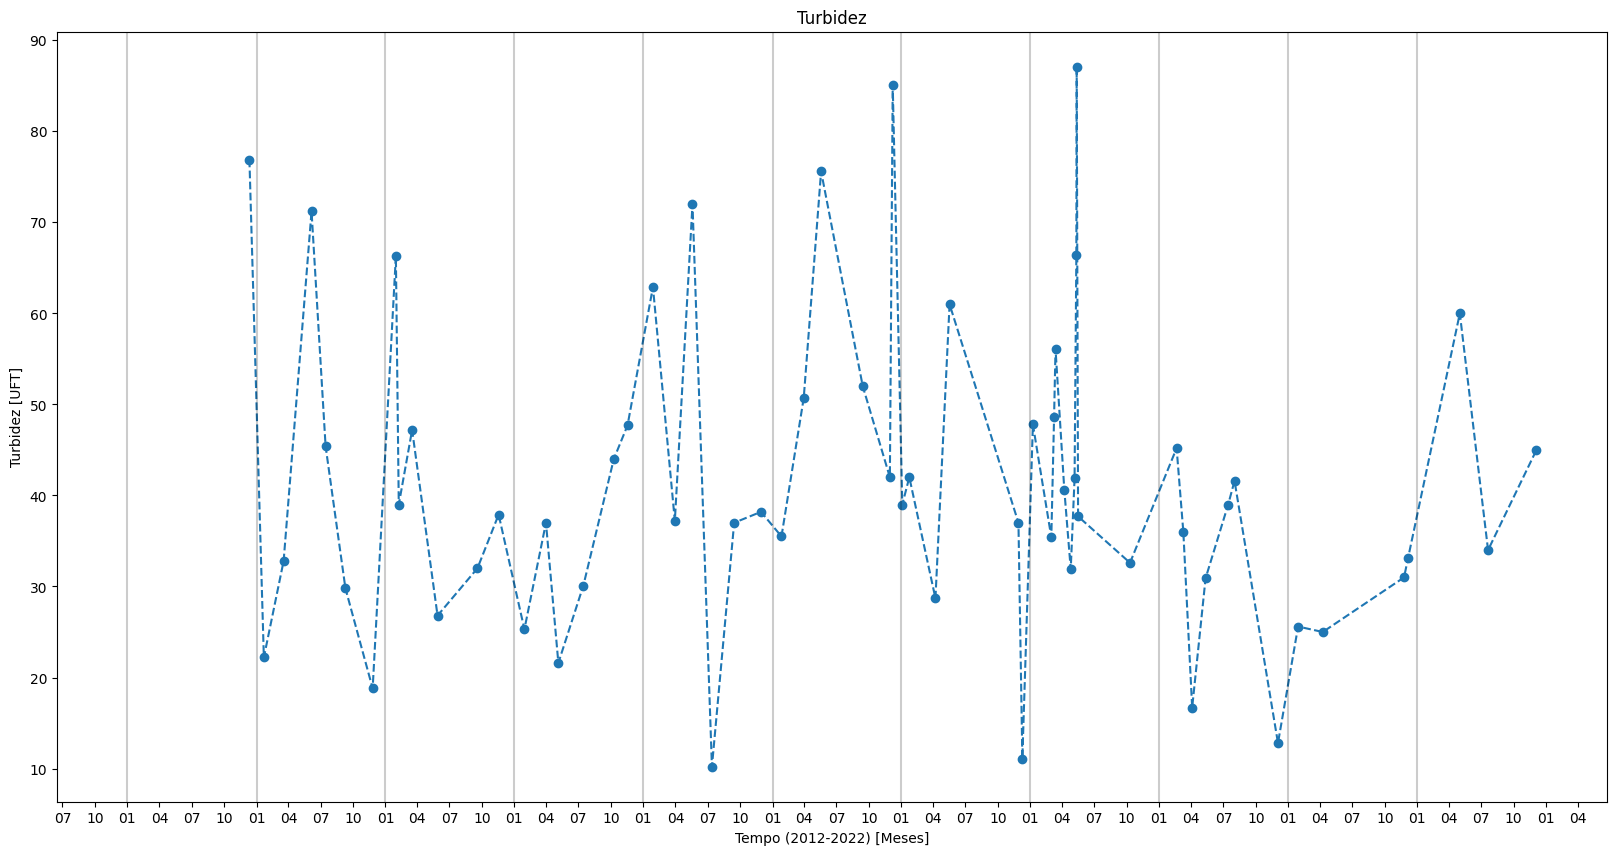

In [267]:
plot_historic('Turbidez', df_2012_2022_turbidez['datetime'], df_2012_2022_turbidez['Valor'].astype(float), 'Tempo (2012-2022) [Meses]', 'Turbidez [UFT]')

conama, colocar nosso ponto em contexto, iqa